In [155]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv('bus.csv')

In [93]:
def format_time(time):
    return datetime.fromisoformat(time[:-1])

In [94]:
def subtract_time(observed, scheduled):
    return (observed - scheduled).total_seconds() / 60

In [144]:
#missing data
missing = data.id.count() - data.observed_visit_time.count() 

#dropping rows where observed_visit_time data is missing
observed_times = data.dropna(subset = ["observed_visit_time", "scheduled_visit_time"]) 
observed_times_copy = observed_times.copy()
observed_times_copy['observed_visit_time'] = observed_times_copy['observed_visit_time'].map(format_time)
observed_times_copy['scheduled_visit_time'] = observed_times_copy['scheduled_visit_time'].map(format_time)

observed_times_formatted = observed_times_copy['observed_visit_time']
observed_times_formatted = observed_times_formatted.reset_index(drop=True)

scheduled_times_formatted = observed_times_copy['scheduled_visit_time']
scheduled_times_formatted = scheduled_times_formatted.reset_index(drop=True)

difference_times_total = np.empty(0)
difference_times_weekday = np.empty(0)
difference_times_weekend = np.empty(0)

for number in range(0, observed_times_formatted.shape[0] - 1):
    time = subtract_time(observed_times_formatted[number], scheduled_times_formatted[number])
    if (scheduled_times_formatted[number].weekday() == 5 or scheduled_times_formatted[number].weekday() == 6):
        difference_times_weekend = np.append(difference_times_weekend, time)
    else: 
        difference_times_weekday = np.append(difference_times_weekday, time)
    
    difference_times_total = np.append(difference_times_total, time)


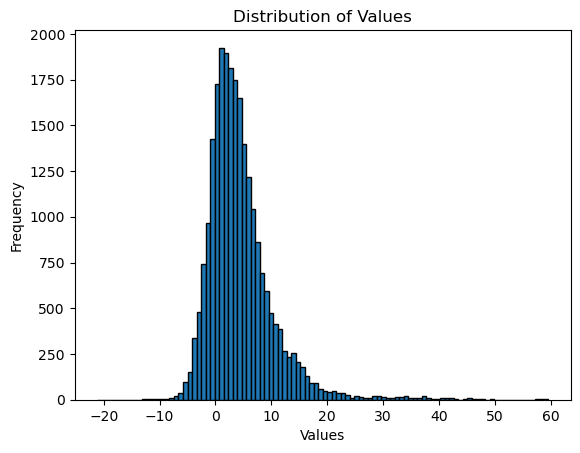

4.3801552375437725
0.6577666666666667
6.651983333333334


In [145]:
# Create a histogram plot
plt.hist(difference_times, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

print(difference_times_total.mean())
print(np.quantile(difference_times_total, 0.25))
print(np.quantile(difference_times_total, 0.75))



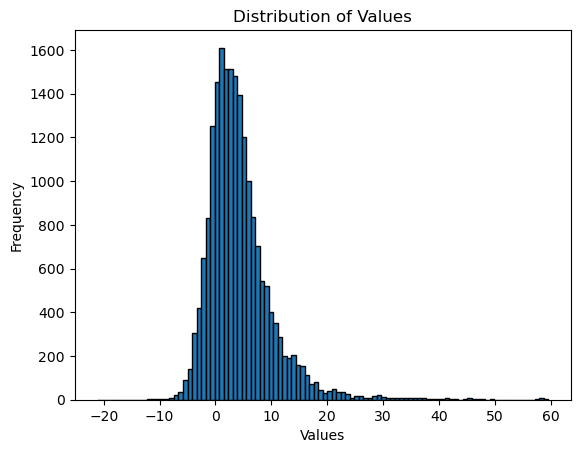

4.276248215403367
0.5681916666666667
6.5301125


In [142]:
# Create a histogram plot
plt.hist(difference_times_weekday, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

print(difference_times_weekday.mean())
print(np.quantile(difference_times_weekday, 0.25))
print(np.quantile(difference_times_weekday, 0.75))

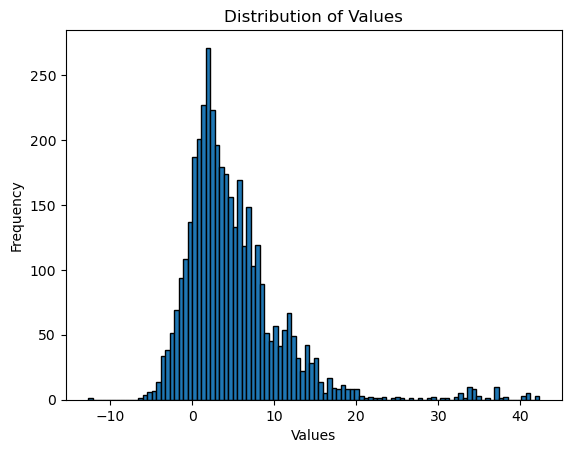

4.91387866751269
1.1464083333333335
7.182654166666667


In [141]:
# Create a histogram plot
plt.hist(difference_times_weekend, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

print(difference_times_weekend.mean())
print(np.quantile(difference_times_weekend, 0.25))
print(np.quantile(difference_times_weekend, 0.75))

In [191]:

weekday_sum = 0
weekend_sum = 0
time_of_day = np.empty(0)

missing_data = data.copy()
observed_visit_times = missing_data['observed_visit_time']
scheduled_visit_times = missing_data['scheduled_visit_time']
missing_data_times = missing_data['scheduled_visit_time'].map(format_time)
for number in range(0, missing_data.shape[0] - 1):
    if (observed_visit_times[number] != observed_visit_times[number]):   
        if (missing_data_times[number].weekday() == 6 or missing_data_times[number].weekday() == 5):
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekend_sum += 1
        else:
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekday_sum += 1
        
print(weekday_sum)
print(weekend_sum)
print(time_of_day)

8433
1155
[ 0.  0.  0. ... 11. 12. 12.]


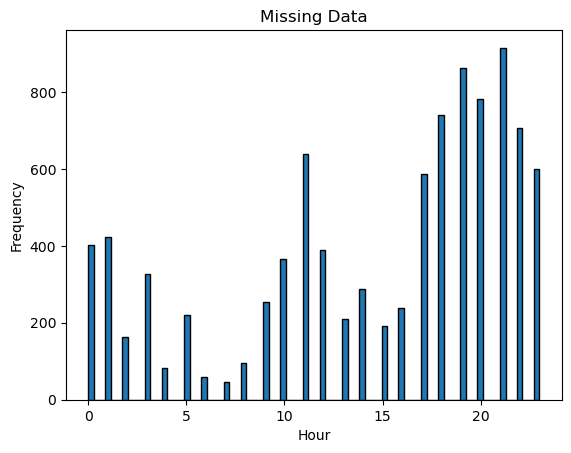

In [190]:
# Create a histogram plot
plt.hist(time_of_day, bins=80, edgecolor='black')

# Set plot title and labels
plt.title('Missing Data')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# Display the plot
plt.show()